In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}
)

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment FrozenLake-v3 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Success rate: 0.6065
Final Q-Table Values
LEFT DOWN RIGHT UP
[[4.57534164e-01 9.99043886e-03 5.69039560e-03 2.26048564e-02]
 [2.78591082e-03 8.77751301e-03 4.93893852e-03 5.68539815e-01]
 [7.35511744e-03 1.51112472e-02 3.51402679e-03 5.14125272e-01]
 [9.46984430e-04 6.96072435e-03 0.00000000e+00 3.24829244e-01]
 [6.32551440e-01 1.30538955e-03 2.97894273e-03 3.24745913e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29109003e-03 1.60455738e-05 3.98690490e-01 1.90165659e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.05990007e-03 0.00000000e+00 0.00000000e+00 4.37886827e-01]
 [0.00000000e+00 6.46443185e-01 2.61773361e-03 9.81562558e-04]
 [9.26689850e-01 8.31424066e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.07613488e-03 7.67184914e-01 1.98321907e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.96583349

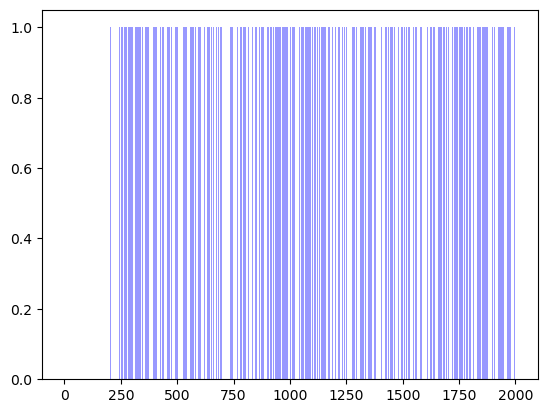

In [12]:
env = gym.make('FrozenLake-v3')
 
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85  
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()[0]
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _, info = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate *(reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()